In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch, torch.nn as nn
from torch.utils.data import DataLoader, random_split

import sys, os
sys.path.append(os.path.join(os.path.dirname("./"), '..'))

from Models.ResNet import ResNet18
from Models.VisionTransformer import VisionTransformerModel
from Models.ViTResNetMixed import ViTResNet
from Models.ResNet import MiniResNet
from utils.Training import Train
from utils.CustomDataset import CustomDataset

In [3]:
# Loading the data
TestData, TestLabels = [], []
TrainData, TrainLabels = [], []

LabelToId = {'no': 0, 'sphere':1, 'vort':2}

# Walking through the train directory and loading the data
for root, dirs, files in os.walk("../dataset/DatasetTask1/train"):
    for dir in dirs:
        for root2, dirs2, files2 in os.walk(os.path.join(root, dir)):
            for file in files2:
                TrainData.append(np.load(os.path.join(root2, file)))
                TrainLabels.append(LabelToId[dir])

# Walking through the test directory and loading the data
for root, dirs, files in os.walk("../dataset/DatasetTask1/val"):
    for dir in dirs:
        for root2, dirs2, files2 in os.walk(os.path.join(root, dir)):
            for file in files2:
                TestData.append(np.load(os.path.join(root2, file)))
                TestLabels.append(LabelToId[dir])

TestData = np.array(TestData)
TrainData = np.array(TrainData)

In [4]:
np.unique(TrainLabels, return_counts=True), np.unique(TestLabels, return_counts=True)

((array([0, 1, 2]), array([10000, 10000, 10000])),
 (array([0, 1, 2]), array([2500, 2500, 2500])))

In [5]:
TestLabels = torch.Tensor(TestLabels)
TestData = torch.Tensor(TestData)
TrainLabels = torch.Tensor(TrainLabels)
TrainData = torch.Tensor(TrainData)

TestDataset = CustomDataset(TestData, TestLabels)
TrainDataset = CustomDataset(TrainData, TrainLabels)

# Splitting and creating the dataset into training and validation
TrainLen = int(0.9 * len(TrainDataset))
ValLen = len(TrainDataset) - TrainLen

TrainDataset, ValidationDataset = random_split(TrainDataset, lengths=[TrainLen, ValLen])

In [6]:
len(TrainDataset), len(ValidationDataset), len(TestDataset)

(27000, 3000, 7500)

In [7]:
TrainLoader = DataLoader(TrainDataset, batch_size=32, shuffle=True)
ValidationLoader = DataLoader(ValidationDataset, batch_size=32, shuffle=True)
TestLoader = DataLoader(TestDataset, batch_size=32, shuffle=True)

In [8]:
device = torch.device("cpu")

if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.mps.is_available():
    device = torch.device("mps")   # I have a MacBook hence this option


# Building the model: 
model4 = ResNet18(input_size=150, in_channels= 1, num_classes= 3).to(device)
model2 = VisionTransformerModel((1,150,150), 15, 256, 3).to(device)
model3 = ViTResNet((1,150,150), 15, 256).to(device)
model1 = MiniResNet(150, 1, 3).to(device)

print(f"Using device: {device}")

Using device: mps


100%|██████████| 94/94 [00:00<00:00, 99.84it/s] 


Epoch 1/100 -
	Training Loss: 1.0965099398276252 
	Accuracy: 11.188388625592417
	AUC Score: 0.5270961904920769

	Val Loss: 1.092005616806923 
	Val Accuracy: 11.585106382978724
	Val AUC Score: 0.5510128385658833



100%|██████████| 94/94 [00:00<00:00, 99.82it/s] 


Epoch 11/100 -
	Training Loss: 0.9393308091361375 
	Accuracy: 17.239336492890995
	AUC Score: 0.7523997135846097

	Val Loss: 0.9415546934655372 
	Val Accuracy: 17.170212765957448
	Val AUC Score: 0.7532537158934954



100%|██████████| 94/94 [00:00<00:00, 100.79it/s]


Epoch 21/100 -
	Training Loss: 0.8782114777802291 
	Accuracy: 19.9478672985782
	AUC Score: 0.8105020039472002

	Val Loss: 0.8816638208450155 
	Val Accuracy: 19.680851063829788
	Val AUC Score: 0.806197088552606



100%|██████████| 94/94 [00:00<00:00, 102.31it/s]


Epoch 31/100 -
	Training Loss: 0.802491510648863 
	Accuracy: 23.304502369668246
	AUC Score: 0.8829805106320749

	Val Loss: 0.8361635721744375 
	Val Accuracy: 21.96808510638298
	Val AUC Score: 0.8580499387161742



100%|██████████| 94/94 [00:00<00:00, 102.69it/s]


Epoch 41/100 -
	Training Loss: 0.7450889547430508 
	Accuracy: 25.395734597156398
	AUC Score: 0.9234916262900148

	Val Loss: 0.7977889256274446 
	Val Accuracy: 23.28723404255319
	Val AUC Score: 0.8887476446784344



100%|██████████| 94/94 [00:00<00:00, 102.44it/s]


Epoch 51/100 -
	Training Loss: 0.7025498688503464 
	Accuracy: 26.851895734597157
	AUC Score: 0.9498396680254186

	Val Loss: 0.7710049634284162 
	Val Accuracy: 24.4468085106383
	Val AUC Score: 0.9087091931870026



100%|██████████| 94/94 [00:00<00:00, 104.03it/s]


Epoch 61/100 -
	Training Loss: 0.6723271623183201 
	Accuracy: 27.900473933649288
	AUC Score: 0.963642140274604

	Val Loss: 0.7736838922855702 
	Val Accuracy: 24.329787234042552
	Val AUC Score: 0.9056539818186291



100%|██████████| 94/94 [00:00<00:00, 103.88it/s]


Epoch 71/100 -
	Training Loss: 0.6422650244139947 
	Accuracy: 28.941943127962084
	AUC Score: 0.975226376876235

	Val Loss: 0.7455325316875538 
	Val Accuracy: 25.28723404255319
	Val AUC Score: 0.9245958520028583



100%|██████████| 94/94 [00:00<00:00, 101.25it/s]


Epoch 81/100 -
	Training Loss: 0.6226675886113496 
	Accuracy: 29.59004739336493
	AUC Score: 0.9830188913843572

	Val Loss: 0.7406573213161306 
	Val Accuracy: 25.53191489361702
	Val AUC Score: 0.9271941091926023



100%|██████████| 94/94 [00:00<00:00, 104.25it/s]


Epoch 91/100 -
	Training Loss: 0.6072530998579134 
	Accuracy: 30.129146919431278
	AUC Score: 0.9871318309451106

	Val Loss: 0.7412683951093796 
	Val Accuracy: 25.351063829787233
	Val AUC Score: 0.9262947196814785



100%|██████████| 94/94 [00:00<00:00, 103.03it/s]


Final Performance:
	Training Loss: 0.7455066430081406
	Test Loss: 0.8110356747279777
	Training Accuracy : 25.066445497630326
	Test Accuracy : 22.77446808510639
	Training AUC Score : 87.65194091560033
	Test AUC Score : 0.8689453830777474
Finished Training


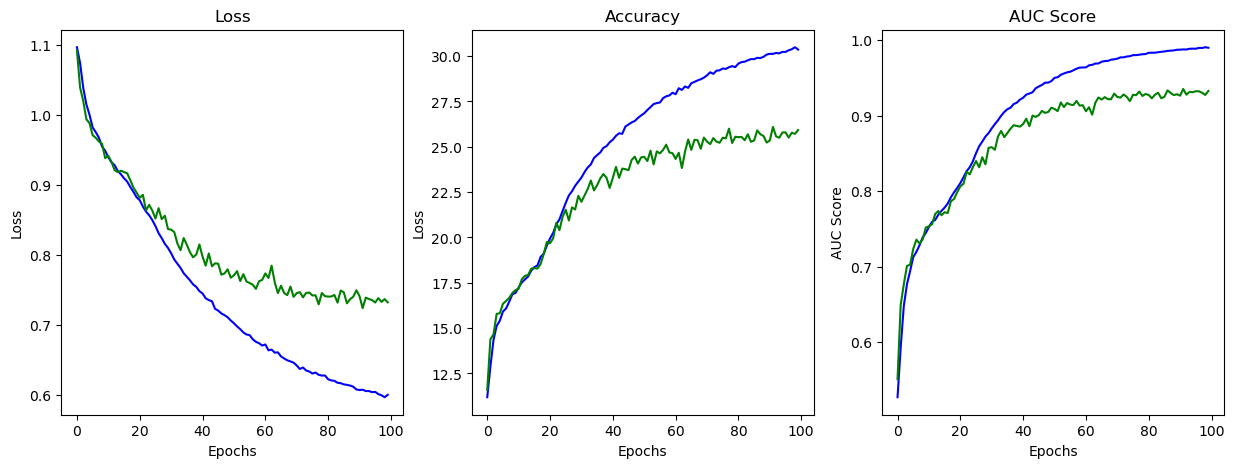

In [9]:
LossFunc = nn.CrossEntropyLoss()
Optimizer = torch.optim.AdamW(model1.parameters(), lr=1e-4)

Train(model1, TrainLoader, ValidationLoader, LossFunc, Optimizer, 100, device)

In [10]:
torch.save(model1, "../ModelWeights/ResNet18.pth")

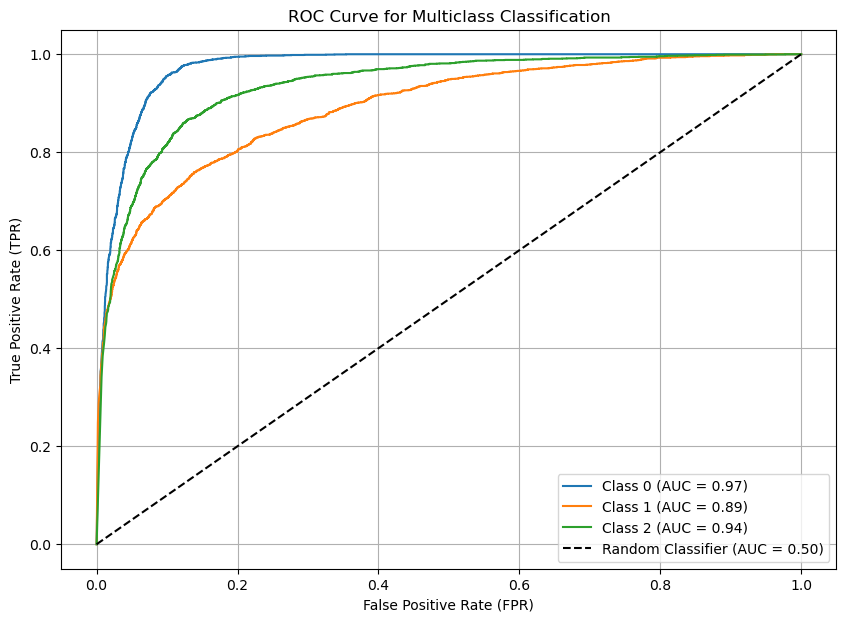

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def plot_multiclass_roc(y_true, y_pred, num_classes):
    y_true_one_hot = label_binarize(y_true, classes=np.arange(num_classes))

    plt.figure(figsize=(10, 7))

    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_true_one_hot[:, i], y_pred[:, i])
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_score:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier (AUC = 0.50)")
    
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("ROC Curve for Multiclass Classification")
    plt.legend()
    plt.grid()
    plt.show()


def evaluate_model_roc(model, dataloader, device, num_classes):
    model.eval()  # Set model to evaluation mode
    y_true_list = []
    y_pred_list = []

    with torch.no_grad(): 
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            
            logits = model(images) 
            
            y_true_list.append(labels.cpu().numpy())
            y_pred_list.append(logits.cpu().numpy())

    y_true = np.concatenate(y_true_list, axis=0)
    y_pred = np.concatenate(y_pred_list, axis=0)

    plot_multiclass_roc(y_true, y_pred, num_classes)

evaluate_model_roc(model1, TestLoader, device, num_classes=3)
